# Chapter 10 exercise

Train an MLP on the MNIST dataset. See if you can get over 98% precision. Search for optimal learning rate by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up. 

Add checkpoints, early stopping, and plot learning curves using Tensorboard.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

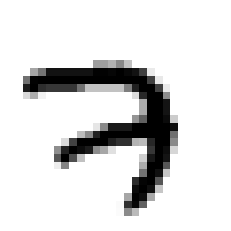

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
y_train.shape

(55000,)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 991us/step - loss: 0.6128 - accuracy: 0.8457 - val_loss: 0.2976 - val_accuracy: 0.9208
Epoch 2/20
1719/1719 [==============================] - 2s 919us/step - loss: 0.2858 - accuracy: 0.9193 - val_loss: 0.2392 - val_accuracy: 0.9348
Epoch 3/20
1719/1719 [==============================] - 2s 926us/step - loss: 0.2324 - accuracy: 0.9340 - val_loss: 0.1997 - val_accuracy: 0.9446
Epoch 4/20
1719/1719 [==============================] - 2s 926us/step - loss: 0.1990 - accuracy: 0.9435 - val_loss: 0.1758 - val_accuracy: 0.9522
Epoch 5/20
1719/1719 [==============================] - 2s 952us/step - loss: 0.1736 - accuracy: 0.9504 - val_loss: 0.1582 - val_accuracy: 0.9578
Epoch 6/20
1719/1719 [==============================] - 2s 956us/step - loss: 0.1547 - accuracy: 0.9554 - val_loss: 0.1415 - val_accuracy: 0.9620
Epoch 7/20
1719/1719 [==============================] - 2s 931us/step - loss: 0.1389 - accuracy: 0.9600 - val_loss: 0.1320 -

Close to 98% accuracy, but not there.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

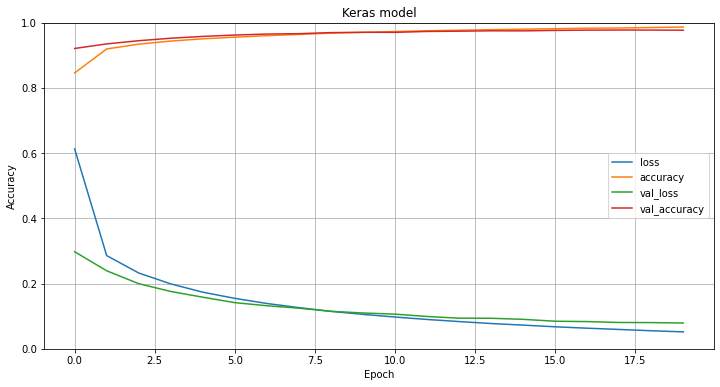

In [12]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

Evaluate on test set

In [13]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 0s 1ms/step - loss: 13.5514 - accuracy: 0.9719


[13.551373481750488, 0.9718999862670898]

## Callbacks and early stopping

In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### Callback

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8046 - accuracy: 0.5294 - val_loss: 1.2379 - val_accuracy: 0.7800
Epoch 2/20
1719/1719 [==============================] - 2s 949us/step - loss: 0.9248 - accuracy: 0.8169 - val_loss: 0.6932 - val_accuracy: 0.8482
Epoch 3/20
1719/1719 [==============================] - 2s 952us/step - loss: 0.6128 - accuracy: 0.8555 - val_loss: 0.5203 - val_accuracy: 0.8720
Epoch 4/20
1719/1719 [==============================] - 2s 952us/step - loss: 0.4978 - accuracy: 0.8726 - val_loss: 0.4417 - val_accuracy: 0.8894
Epoch 5/20
1719/1719 [==============================] - 2s 952us/step - loss: 0.4391 - accuracy: 0.8833 - val_loss: 0.3974 - val_accuracy: 0.8956
Epoch 6/20
1719/1719 [==============================] - 2s 961us/step - loss: 0.4031 - accuracy: 0.8905 - val_loss: 0.3683 - val_accuracy: 0.9016
Epoch 7/20
1719/1719 [==============================] - 2s 954us/step - loss: 0.3779 - accuracy: 0.8951 - val_loss: 0.3468 - v

Performed worse with callback. Learning rate was 0.001 vs. default in previous model at 0.01

In [21]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 690us/step - loss: 33.1855 - accuracy: 0.1024


Accuracy is atrocious on the test set. Seems strange.

### Early stopping

In [ ]:
Try early stopping with 100 epochs.

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 996us/step - loss: 0.2530 - accuracy: 0.9280 - val_loss: 0.2367 - val_accuracy: 0.9332
Epoch 2/100
1719/1719 [==============================] - 2s 966us/step - loss: 0.2482 - accuracy: 0.9295 - val_loss: 0.2327 - val_accuracy: 0.9348
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2438 - accuracy: 0.9304 - val_loss: 0.2289 - val_accuracy: 0.9374
Epoch 4/100
1719/1719 [==============================] - 2s 991us/step - loss: 0.2395 - accuracy: 0.9320 - val_loss: 0.2256 - val_accuracy: 0.9390
Epoch 5/100
1719/1719 [==============================] - 2s 989us/step - loss: 0.2353 - accuracy: 0.9330 - val_loss: 0.2219 - val_accuracy: 0.9388
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2314 - accuracy: 0.9339 - val_loss: 0.2187 - val_accuracy: 0.9386
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2275 - accuracy: 0.9355 - val_loss: 0.2151 

Better accuracy than callback alone, but not as good as base model. Let's check on the test set.

In [24]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 14.2606 - accuracy: 0.9694


Better, but still not as good as base.

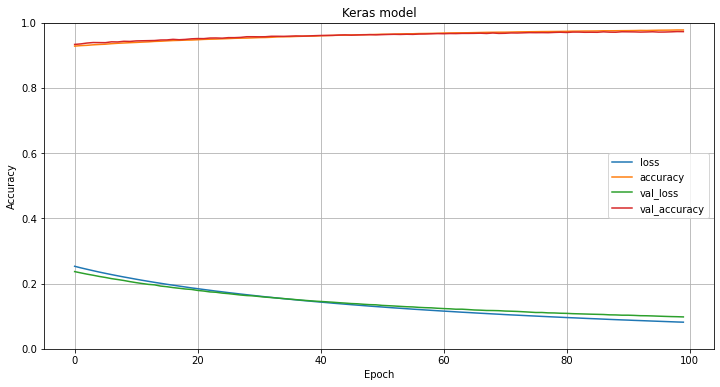

In [25]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

## Learning rate

We'll return to the default learning rate 1e-2, the same as the base model, but implement early stopping and callback on 100 epochs.

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-2), metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6196 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/100
1719/1719 [==============================] - 2s 933us/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2473 - val_accuracy: 0.9304
Epoch 3/100
1719/1719 [==============================] - 2s 940us/step - loss: 0.2430 - accuracy: 0.9302 - val_loss: 0.2060 - val_accuracy: 0.9426
Epoch 4/100
1719/1719 [==============================] - 2s 954us/step - loss: 0.2076 - accuracy: 0.9407 - val_loss: 0.1823 - val_accuracy: 0.9494
Epoch 5/100
1719/1719 [==============================] - 2s 954us/step - loss: 0.1811 - accuracy: 0.9486 - val_loss: 0.1644 - val_accuracy: 0.9538
Epoch 6/100
1719/1719 [==============================] - 2s 966us/step - loss: 0.1603 - accuracy: 0.9543 - val_loss: 0.1483 - val_accuracy: 0.9602
Epoch 7/100
1719/1719 [==============================] - 2s 980us/step - loss: 0.1431 - accuracy: 0.9598 - val_loss: 0.1

Accuracy exceeds 98%! So epochs are the key?

In [29]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 12.6038 - accuracy: 0.9777


Test set accuracy improves as well.

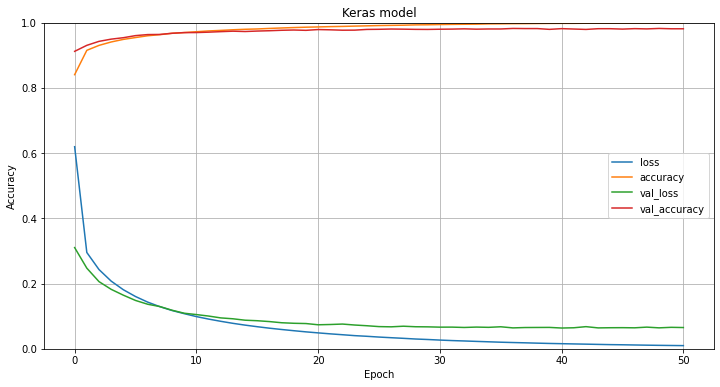

In [30]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

### With learning rate decay schedule

The author says to grow the learning rate exponentially. Yet the keras documentation says the following:\
"When training a model, it is often recommended to lower the learning rate as the training progresses."\
Let's use the default schedule below, but state it explicity, so we can change it later.\
source: https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/

In [32]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [34]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

Note: step is a forward and backward evaluation of one batch. So steps per epoch is number of instances in the dataset / batch_size

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6204 - accuracy: 0.8402 - val_loss: 0.3111 - val_accuracy: 0.9122
Epoch 2/100
1719/1719 [==============================] - 2s 980us/step - loss: 0.2964 - accuracy: 0.9149 - val_loss: 0.2487 - val_accuracy: 0.9304
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2448 - accuracy: 0.9298 - val_loss: 0.2081 - val_accuracy: 0.9426
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2101 - accuracy: 0.9397 - val_loss: 0.1853 - val_accuracy: 0.9488
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1845 - accuracy: 0.9477 - val_loss: 0.1680 - val_accuracy: 0.9536
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1645 - accuracy: 0.9531 - val_loss: 0.1524 - val_accuracy: 0.9582
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1478 - accuracy: 0.9585 - val_loss: 0.1409 - val_

Interesting. Not much improvement.

In [36]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 12.9889 - accuracy: 0.9776


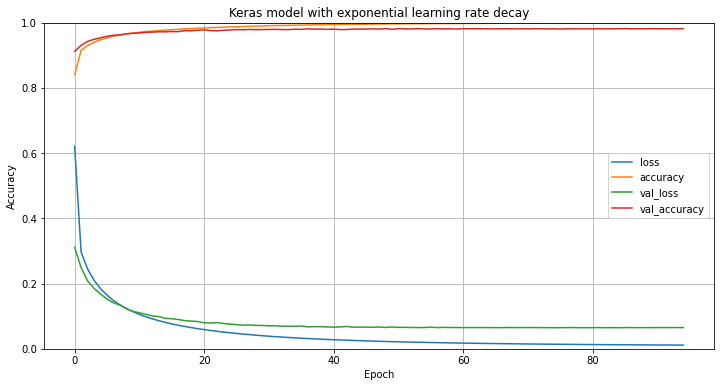

In [37]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model with exponential learning rate decay')
plt.show()

#### Learning rate decay part 2

This time we'll start at a higher learning rate and decay every 1000 steps.

In [38]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [40]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2757 - accuracy: 0.9184 - val_loss: 0.1286 - val_accuracy: 0.9636
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1111 - accuracy: 0.9667 - val_loss: 0.0938 - val_accuracy: 0.9730
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.0750 - val_accuracy: 0.9798
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0711 - val_accuracy: 0.9804
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0416 - accuracy: 0.9881 - val_loss: 0.0681 - val_accuracy: 0.9812
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0320 - accuracy: 0.9914 - val_loss: 0.0635 - val_accuracy: 0.9830
Epoch 7/100
1719/1719 [==============================] - 2s 921us/step - loss: 0.0261 - accuracy: 0.9934 - val_loss: 0.0643 - val_

We got an improvement. But it was modest

In [42]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 11.0974 - accuracy: 0.9793


#### Learning rate growth

Here we'll start small and instead of decaying (0.9 rate) we'll increase (1.1 rate). Not sure if the exponential decay scheduler works that way. But let's see.

In [43]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=1.1)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [46]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 2.3373 - accuracy: 0.1029 - val_loss: 2.2571 - val_accuracy: 0.1316
Epoch 2/100
1719/1719 [==============================] - 2s 977us/step - loss: 2.1760 - accuracy: 0.2099 - val_loss: 2.1024 - val_accuracy: 0.3032
Epoch 3/100
1719/1719 [==============================] - 2s 980us/step - loss: 2.0172 - accuracy: 0.4304 - val_loss: 1.9292 - val_accuracy: 0.5360
Epoch 4/100
1719/1719 [==============================] - 2s 982us/step - loss: 1.8292 - accuracy: 0.6029 - val_loss: 1.7186 - val_accuracy: 0.6676
Epoch 5/100
1719/1719 [==============================] - 2s 991us/step - loss: 1.6022 - accuracy: 0.7054 - val_loss: 1.4713 - val_accuracy: 0.7506
Epoch 6/100
1719/1719 [==============================] - 2s 991us/step - loss: 1.3516 - accuracy: 0.7621 - val_loss: 1.2156 - val_accuracy: 0.7848
Epoch 7/100
1719/1719 [==============================] - 2s 982us/step - loss: 1.1110 - accuracy: 0.7962 - val_loss: 0.9

Stopped at 47th epoch. Accuracy worse that prior. We won't bother with the test accuracy or graphing it.

## Tuning hyperparameters

We're now going to tune the hyperparameters with a grid search. But first we need to build a model so that we can input different hyperparameters. We'll include options to increase number of layers, neurons, and learning rate.

In [59]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
def build_model(n_hidden=3, n_neurons=300, learning_rate=1e-2, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [61]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [62]:
keras_clf.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6196 - accuracy: 0.8411 - val_loss: 0.2845 - val_accuracy: 0.9202
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2693 - accuracy: 0.9218 - val_loss: 0.2180 - val_accuracy: 0.9390
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2103 - accuracy: 0.9387 - val_loss: 0.1718 - val_accuracy: 0.9504
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1716 - accuracy: 0.9501 - val_loss: 0.1457 - val_accuracy: 0.9596
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9577 - val_loss: 0.1306 - val_accuracy: 0.9636
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9639 - val_loss: 0.1172 - val_accuracy: 0.9668
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9687 - val_loss: 0.1082 - val_accuracy:

Only 10 Epochs, but still good accuracy. 

In [63]:
keras_clf.score(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.0408 - accuracy: 0.9701


0.9700999855995178

Let's try with 100 epochs

In [64]:
keras_clf.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6178 - accuracy: 0.8394 - val_loss: 0.2808 - val_accuracy: 0.9254
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2636 - accuracy: 0.9238 - val_loss: 0.2162 - val_accuracy: 0.9398
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2074 - accuracy: 0.9393 - val_loss: 0.1690 - val_accuracy: 0.9550
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1711 - accuracy: 0.9506 - val_loss: 0.1442 - val_accuracy: 0.9612
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1458 - accuracy: 0.9577 - val_loss: 0.1311 - val_accuracy: 0.9640
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1262 - accuracy: 0.9632 - val_loss: 0.1177 - val_accuracy: 0.9682
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1106 - accuracy: 0.9686 - val_loss: 0.1075 - val_ac

Achieved a tad bit over 98%. Let's look at test set.

In [65]:
keras_clf.score(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18.3264 - accuracy: 0.9753


0.9753000140190125

In [67]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_hidden' : [3, 5],
    'n_neurons': [300, 500],
    'learning_rate': [1e-3, 1e-2]
}

grid_cv = GridSearchCV(keras_clf, params, cv=3, verbose=1)
grid_cv.fit(X_train, y_train, epochs=10,
                 validation_data = (X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
1146/1146 [==============================] - 3s 2ms/step - loss: 2.1237 - accuracy: 0.4138 - val_loss: 1.8766 - val_accuracy: 0.6308
Epoch 2/10
1146/1146 [==============================] - 3s 2ms/step - loss: 1.5065 - accuracy: 0.7256 - val_loss: 1.1172 - val_accuracy: 0.7940
Epoch 3/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.8890 - accuracy: 0.8233 - val_loss: 0.7050 - val_accuracy: 0.8426
Epoch 4/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.6233 - accuracy: 0.8541 - val_loss: 0.5413 - val_accuracy: 0.8694
Epoch 5/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.5079 - accuracy: 0.8710 - val_loss: 0.4611 - val_accuracy: 0.8822
Epoch 6/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8813 - val_loss: 0.4120 - val_accuracy: 0.8904
Epoch 7/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.4060 - accuracy: 0.8876 - val_loss: 0.3806 - val_accuracy:

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 13.5min finished


1719/1719 [==============================] - 7s 4ms/step - loss: 0.6397 - accuracy: 0.8285 - val_loss: 0.2466 - val_accuracy: 0.9296
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9316 - val_loss: 0.1758 - val_accuracy: 0.9492
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1685 - accuracy: 0.9503 - val_loss: 0.1348 - val_accuracy: 0.9622
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1315 - accuracy: 0.9614 - val_loss: 0.1116 - val_accuracy: 0.9686
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1079 - accuracy: 0.9679 - val_loss: 0.1057 - val_accuracy: 0.9686
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9733 - val_loss: 0.0910 - val_accuracy: 0.9742
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0741 - accuracy: 0.9782 - val_loss: 0.0900 - val_accuracy: 0.9736
Epo

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EE280541C0>,
             param_grid={'learning_rate': [0.001, 0.01], 'n_hidden': [3, 5],
                         'n_neurons': [300, 500]},
             verbose=1)

In [68]:
grid_cv.best_params_

{'learning_rate': 0.01, 'n_hidden': 5, 'n_neurons': 500}

In [69]:
grid_cv.best_score_

0.9664000471433004

In [70]:
grid_cv.best_estimator_

In [71]:
grid_cv.score(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 12.4643 - accuracy: 0.9732


0.9732000231742859

In [72]:
model = grid_cv.best_estimator_.model
model

In [73]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 12.4643 - accuracy: 0.9732


[12.464293479919434, 0.9732000231742859]

In [75]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9796


[0.07292574644088745, 0.9796000123023987]

Almost 98% accuracy, but only trained on 10 epochs.\
Takeway? More epochs, less tuning?